# Kickstarter Project Statistics

Crowdfunding has become one of the main sources of initial capital for small businesses and start-up companies that are looking to launch their first products. Websites like Kickstarter and Indiegogo provide a platform for millions of creators to present their innovative ideas to the public. This is a win-win situation where creators could accumulate initial fund while the public get access to cutting-edge prototypical products that are not available in the market yet. At any given point, Indiegogo has around 10,000 live campaigns while Kickstarter has 6,000. It has become increasingly difficult for projects to stand out of the crowd. Of course, advertisements via various channels are by far the most important factor to a successful campaign. However, for creators with a smaller budget, this leaves them wonder,

"How do we increase the probability of success of our campaign starting from the very moment we create our project on these websites?"

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline 

In [10]:
live = pd.read_csv("live.csv")

In [13]:
most_backed = pd.read_csv("most_backed.csv")

In [184]:
del most_backed['Unnamed: 0']

In [185]:
del live['Unnamed: 0']

In [186]:
len(live), len(live.columns) #There are no missing data on either live or most_backed datasets 

(4000, 12)

In [188]:
len(most_backed), len(most_backed.columns)

(4000, 14)

In [190]:
live[:3]

,amt.pledged,blurb,by,country,currency,end.time,location,percentage.funded,state,title,type,url
0,15823.0,"\n'Catalysts, Explorers & Secret Keepers: Wome...",Museum of Science Fiction,US,usd,2016-11-01T23:59:00-04:00,"Washington, DC",186,DC,"Catalysts, Explorers & Secret Keepers: Women o...",Town,/projects/1608905146/catalysts-explorers-and-s...
1,6859.0,\nA unique handmade picture book for kids & ar...,"Tyrone Wells & Broken Eagle, LLC",US,usd,2016-11-25T01:13:33-05:00,"Portland, OR",8,OR,The Whatamagump (a hand-crafted story picture ...,Town,/projects/thewhatamagump/the-whatamagump-a-han...
2,17906.0,\nA horror comedy about a repairman who was in...,Tessa Stone,US,usd,2016-11-23T23:00:00-05:00,"Los Angeles, CA",102,CA,Not Drunk Enough Volume 1!,Town,/projects/1890925998/not-drunk-enough-volume-1...


In [191]:
most_backed[:3]

,amt.pledged,blurb,by,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url,goal percent,num_tiers
0,8782571.0,\nThis is a card game for people who are into ...,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens,87825.7100,4
1,6465690.0,"\nAn unusually addicting, high-quality desk to...",Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy,43104.6000,12
2,5408916.0,\nBring Reading Rainbow’s library of interacti...,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...,540.8916,64


In [193]:
most_backed.category.value_counts()[:10]

Product Design    773
Tabletop Games    742
Video Games       524
Hardware          182
Technology        152
Documentary       124
Gadgets           121
Design             99
Comics             79
Wearables          64
Name: category, dtype: int64

In [111]:
most_backed['goal percent'] = (most_backed['amt.pledged']*1.0 / most_backed['goal'])*100
most_backed['goal percent'][:10]

0    87825.710000
1    43104.600000
2      540.891600
3      285.107650
4      834.092750
5     4067.797200
6      465.436333
7      362.448091
8     1194.345143
9     2506.141667
Name: goal percent, dtype: float64

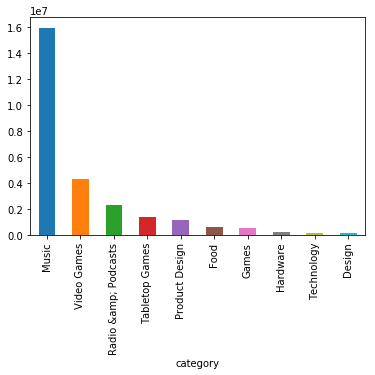

In [159]:
#Music seems to have achieved its goal with the most margin 
most_backed.groupby('category')['goal percent'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

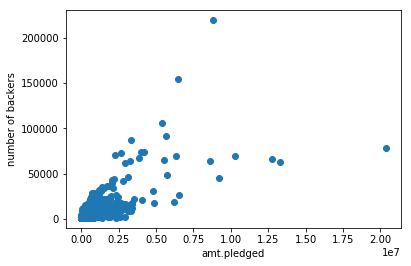

In [161]:
#There's a positive relationship with amt.pledged and num.backers which makes sense. But there are some projects 
#That have less backers with higher pledges than other projects. 
plt.scatter(most_backed['amt.pledged'], most_backed['num.backers'])
plt.xlabel('amt.pledged')
plt.ylabel('number of backers')
plt.show()

In [96]:
print "Percentage of live projects that have reached its goal", len(live.loc[live['percentage.funded'] >= 100])*1.0 / len(live)

Percentage of live projects that have reached its goal 0.1975


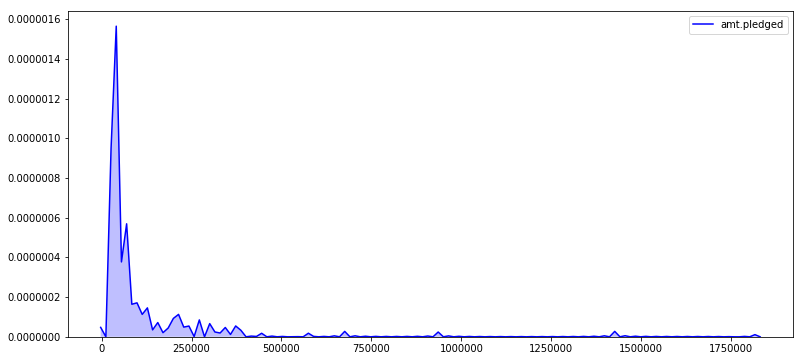

In [77]:
import seaborn as sns 

plt.figure(figsize=(13,6))
sns.kdeplot(live['amt.pledged'], shade=True, color='Blue')

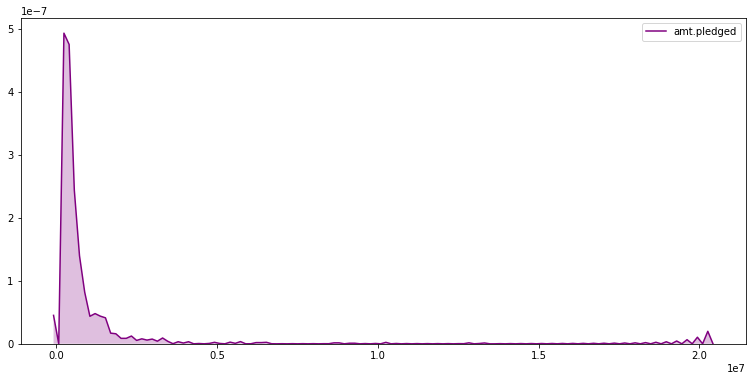

In [84]:
plt.figure(figsize=(13,6))
sns.kdeplot(most_backed['amt.pledged'], shade=True, color='Purple')

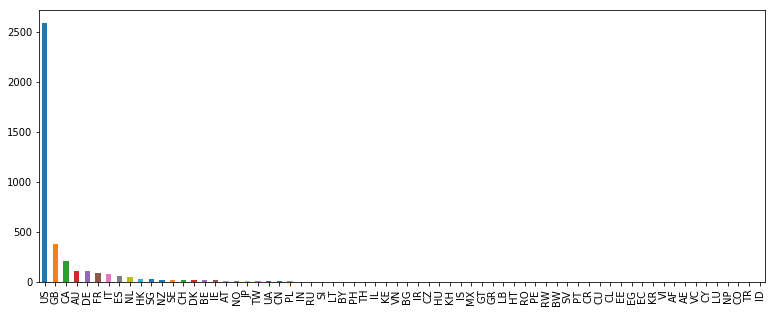

In [164]:
plt.figure(figsize=(13,5))
live.country.value_counts().plot(kind='bar')

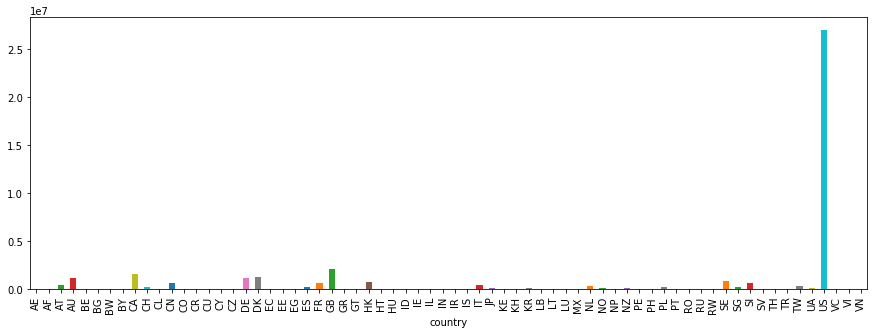

In [163]:
plt.figure(figsize=(15,5))
live.groupby("country")['amt.pledged'].sum().plot(kind='bar')

In [39]:
print "Percentage of US based campaigns", (len(live.loc[live.country == 'US'])*1.0 / len(live.country))*100, "%"

 Percentage of US based campaigns 64.6 %


In [44]:
print "Percentage of amount pledged that are US based campaigns", \
((live.loc[live.country == 'US']['amt.pledged'].sum()) / (live['amt.pledged'].sum()))*100, '%'

Percentage of amount pledged that are US based campaigns 65.8924093122 %


In [63]:
#convert all the currency into USD dollars 
most_backed.currency.unique()

array(['usd', 'gbp', 'cad', 'aud', 'eur', 'sek', 'nzd', 'dkk', 'chf'], dtype=object)

In [136]:
def convert_currency(): 
    for i in range(most_backed.shape[0]): 
        if most_backed['currency'].iloc[i] != 'usd': 
            if most_backed['currency'].iloc[i] == 'gbp': 
                most_backed['amt.pledged'].iloc[i] *= 1.27
            elif most_backed['currency'].iloc[i] == 'cad': 
                most_backed['amt.pledged'].iloc[i] *= 0.75
            elif most_backed['currency'].iloc[i] == 'aud': 
                most_backed['amt.pledged'].iloc[i] *= 0.74
            elif most_backed['currency'].iloc[i] == 'eur': 
                most_backed['amt.pledged'].iloc[i] *= 1.07
            elif most_backed['currency'].iloc[i] == 'sek': 
                most_backed['amt.pledged'].iloc[i] *= 0.11
            elif most_backed['currency'].iloc[i] == 'nzd': 
                most_backed['amt.pledged'].iloc[i] *= 0.71
            elif most_backed['currency'].iloc[i] == 'dkk': 
                most_backed['amt.pledged'].iloc[i] *= 0.14
            elif most_backed['currency'].iloc[i] == 'chf': 
                most_backed['amt.pledged'].iloc[i] *= 0.99
        else: 
            pass 

convert_currency()

/Users/chloekwon/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Let's dive deeper into the top 10 categories based on total amount pledged in USD

In [144]:
top10 = most_backed.groupby('category').sum()[['amt.pledged','num.backers']].reset_index().sort_values('amt.pledged',ascending=False).head(10)
top10['amt.pledged'] = pd.to_numeric(top10['amt.pledged'].apply(lambda x : '%.f' % x))
top10['avg pledged by backers'] = top10['amt.pledged'] / top10['num.backers']
top10

,category,amt.pledged,num.backers,avg pledged by backers
80,Product Design,276376356,2801518,98.652358
99,Tabletop Games,199312319,2460853,80.993184
107,Video Games,143600898,3000001,47.866950
50,Hardware,68592155,624712,109.798043
100,Technology,61936653,568784,108.893100
45,Gadgets,32963310,355290,92.778603
108,Wearables,28352850,203211,139.524189
28,Design,20695752,279935,73.930562
95,Sound,20308326,105782,191.982814
30,Documentary,18453099,290974,63.418378


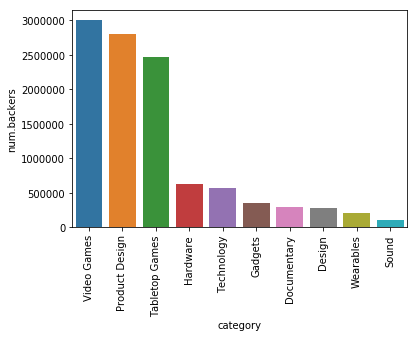

In [151]:
#How many backers are on each top10 category 
sns.barplot(x='category', y='num.backers',data=top10.sort_values('num.backers',ascending=False))
plt.xticks(rotation=90)
plt.show()

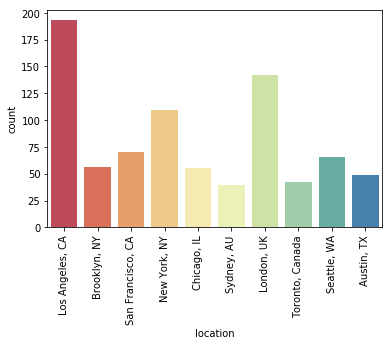

In [125]:
#10 Most Popular location for live projects 

sns.countplot(x='location', data=live[live['location'].isin(live['location'].value_counts()[:10].index)],
             palette=sns.color_palette('Spectral',10))
plt.xticks(rotation=90)
plt.show()

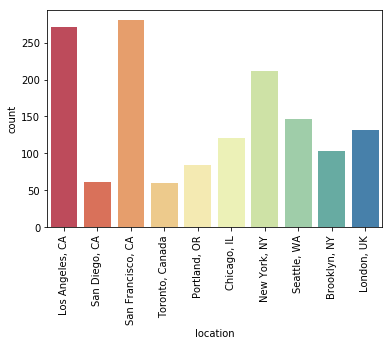

In [123]:
#10 Most popular location for most backed projects 

sns.countplot(x='location',data=most_backed[most_backed['location'].isin(most_backed['location'].value_counts()
[:10].index)], palette=sns.color_palette('Spectral', 10))
plt.xticks(rotation=90)
plt.show()

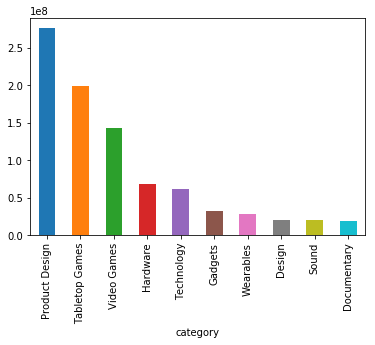

In [145]:
#most_backed projects - which category has most amt.pledged 

most_backed.groupby('category')['amt.pledged'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

In [133]:
most_backed.groupby('category')['amt.pledged'].sum().sort_values(ascending=False)[:10]

category
Product Design    279491110.0
Tabletop Games    204123729.0
Video Games       142837755.0
Hardware           72514425.0
Technology         64281911.0
Gadgets            34236825.0
Wearables          28070833.0
Design             20655212.0
Sound              20168046.0
Documentary        18710546.0
Name: amt.pledged, dtype: float64

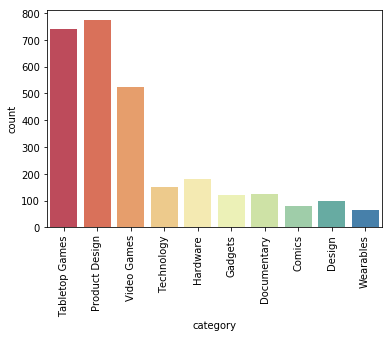

In [149]:
#Most common categories for most_backed projects 
sns.countplot(x='category',data=most_backed[most_backed['category'].isin(most_backed['category'].value_counts()
[:10].index)], palette=sns.color_palette("Spectral",10))
plt.xticks(rotation=90)
plt.show()

Does the number of tiers available have any relationship with the amount pledged? 
- If there are number of tiers associated with highest amount pledged, we could use this information to guide next kickstarter projects to get more amount pledged. 

In [153]:
num_tiers = [len(row.split()) for row in most_backed['pledge.tier']]
most_backed['num_tiers'] = pd.Series(num_tiers, index=most_backed.index)

In [165]:
pledged_by_tiers = []
perc_goal_by_tiers = []

for i in range(1,101): 
    pledged_by_tiers.append([])
    perc_goal_by_tiers.append([])
    for index, row in most_backed.iterrows(): 
        if row['num_tiers'] == i: 
            pledged_by_tiers[i-1].append(row['amt.pledged'])
            perc_goal_by_tiers[i-1].append((row['amt.pledged']*1.0 / row['goal']) *100)

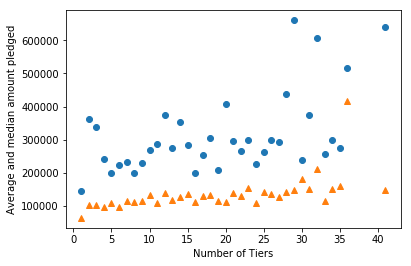

In [167]:
#Number of tiers and amount pledged 
avgs = []
median = []
num_tiers = [] 
for i in range(100): 
    if len(pledged_by_tiers[i]) > 10: #Ignore tier numbers with insufficient data 
        avgs.append(np.average(pledged_by_tiers[i]))
        median.append(np.median(pledged_by_tiers[i]))
        num_tiers.append(i+1)
plt.plot(num_tiers, avgs, marker='o',linestyle='None', label='Average')
plt.plot(num_tiers, median, marker= '^', linestyle='None', label='Median')
plt.xlabel('Number of Tiers')
plt.ylabel('Average and median amount pledged')
plt.show()

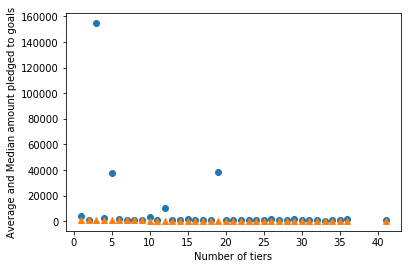

In [168]:
#Number of tiers and amount pledged relative to goals 

avgs = []
median = []
num_tiers = []
for i in range(100): 
    if len(perc_goal_by_tiers[i]) > 10: 
        avgs.append(np.average(perc_goal_by_tiers[i]))
        median.append(np.median(perc_goal_by_tiers[i]))
        num_tiers.append(i+1)
plt.plot(num_tiers, avgs, marker = 'o', linestyle = 'None', label="Average")
plt.plot(num_tiers, median, marker = '^', linestyle = 'None', label="Median")
plt.xlabel("Number of tiers")
plt.ylabel("Average and Median amount pledged to goals")
plt.show()

As the number of tiers increase, there are slight increase in median amount pledged and upward trend with average amount pledged with high variance (with a few outliers). In terms of amount pledged relative to goals, there doesn't seem to be much difference in median, but there are few outliers on average amount pledged that show very high percentage relative to goals on 5 and 20 tiers. If we were to set the guideline for future projects, we might consider having 5 or 20 tiers with the understanding that there are variance but higher tiers seem to return most amount pledged. 

In [177]:
#Let's look at the blurb for the projects to see if there are any words that most frequently show up with most backed projects

import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import wordpunct_tokenize
from wordcloud import WordCloud as wc 

In [178]:
stop = set(stopwords.words('english'))
stop.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '@', '#'])

In [179]:
list_of_words = []
def get_words(s): 
    list_of_words_line = [i.lower() for i in wordpunct_tokenize(s) if i.lower() not in stop and i.isalpha()]
    list_of_words.append(list_of_words_line)

most_backed['blurb'].map(get_words)
flat_list = [item for sublist in list_of_words for item in sublist]

In [180]:
list_of_words = flat_list
str1 = ' '.join(list_of_words)

In [181]:
wordFreqList = nltk.FreqDist(list_of_words)
mostcommon = wordFreqList.most_common(30)
mostcommon

[('game', 672),
 ('new', 393),
 ('world', 377),
 ('first', 252),
 ('help', 202),
 ('one', 188),
 ('card', 162),
 ('time', 159),
 ('designed', 158),
 ('adventure', 156),
 ('make', 149),
 ('players', 144),
 ('games', 133),
 ('us', 130),
 ('book', 130),
 ('based', 127),
 ('get', 124),
 ('board', 123),
 ('set', 121),
 ('rpg', 120),
 ('life', 110),
 ('iphone', 110),
 ('way', 109),
 ('made', 109),
 ('like', 107),
 ('play', 107),
 ('design', 106),
 ('use', 102),
 ('best', 100),
 ('story', 100)]

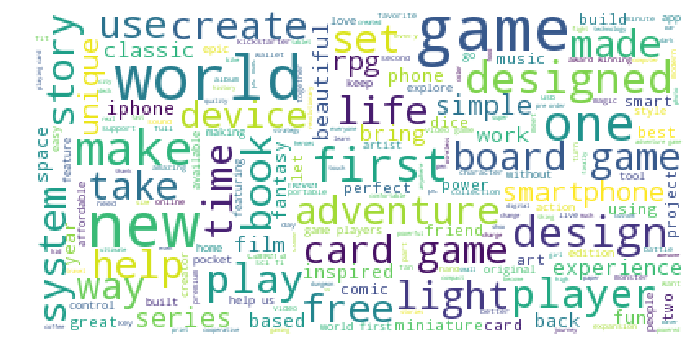

In [183]:
plt.subplots(figsize=(15,6))
wordcloud = wc(
                background_color='white',
                max_words = 200,
                max_font_size=40,
                random_state=42).generate(str1)
print wordcloud
fig=plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()